## Time series project


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#title_basic=pd.read_csv('name.basics.csv')
df=pd.read_csv('demand_inventory.csv',index_col=0)
df.head()

,Date,Product_ID,Demand,Inventory
0,2023-06-01,P1,51,5500
1,2023-06-02,P1,141,5449
2,2023-06-03,P1,172,5308
3,2023-06-04,P1,91,5136
4,2023-06-05,P1,198,5045


##### How many Rows and Columns we have in the dataset.

In [83]:
df.isna().sum()

Date          0
Product_ID    0
Demand        0
Inventory     0
dtype: int64

In [84]:
df.shape

(62, 4)

##### Checking datatypes of our columns

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        62 non-null     object
 1   Product_ID  62 non-null     object
 2   Demand      62 non-null     int64 
 3   Inventory   62 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


##### Checking for missing data

In [86]:
df.isna().any()

Date          False
Product_ID    False
Demand        False
Inventory     False
dtype: bool

In [87]:
# Drop duplicate rows
df_no_duplicates = df.drop_duplicates()

# Print DataFrame without duplicates
print(df_no_duplicates)


          Date Product_ID  Demand  Inventory
0   2023-06-01         P1      51       5500
1   2023-06-02         P1     141       5449
2   2023-06-03         P1     172       5308
3   2023-06-04         P1      91       5136
4   2023-06-05         P1     198       5045
..         ...        ...     ...        ...
57  2023-07-28         P1     174          0
58  2023-07-29         P1      72          0
59  2023-07-30         P1      52          0
60  2023-07-31         P1     188          0
61  2023-08-01         P1     102          0

[62 rows x 4 columns]


In [88]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month



In [89]:
df.head()

,Date,Product_ID,Demand,Inventory,Year,Month
0,2023-06-01,P1,51,5500,2023,6
1,2023-06-02,P1,141,5449,2023,6
2,2023-06-03,P1,172,5308,2023,6
3,2023-06-04,P1,91,5136,2023,6
4,2023-06-05,P1,198,5045,2023,6


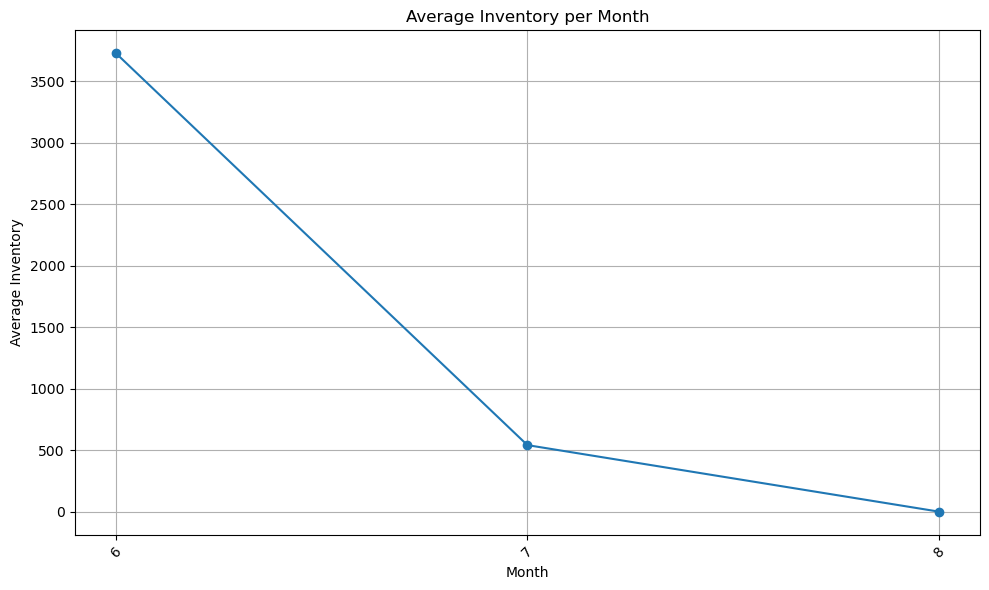

In [90]:

# Group by Year and Month, and calculate average Inventory
monthly_avg_inventory = df.groupby(['Month'])['Inventory'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_inventory['Month'].astype(str).astype(str),
         monthly_avg_inventory['Inventory'], marker='o')

plt.xlabel('Month')
plt.ylabel('Average Inventory')
plt.title('Average Inventory per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

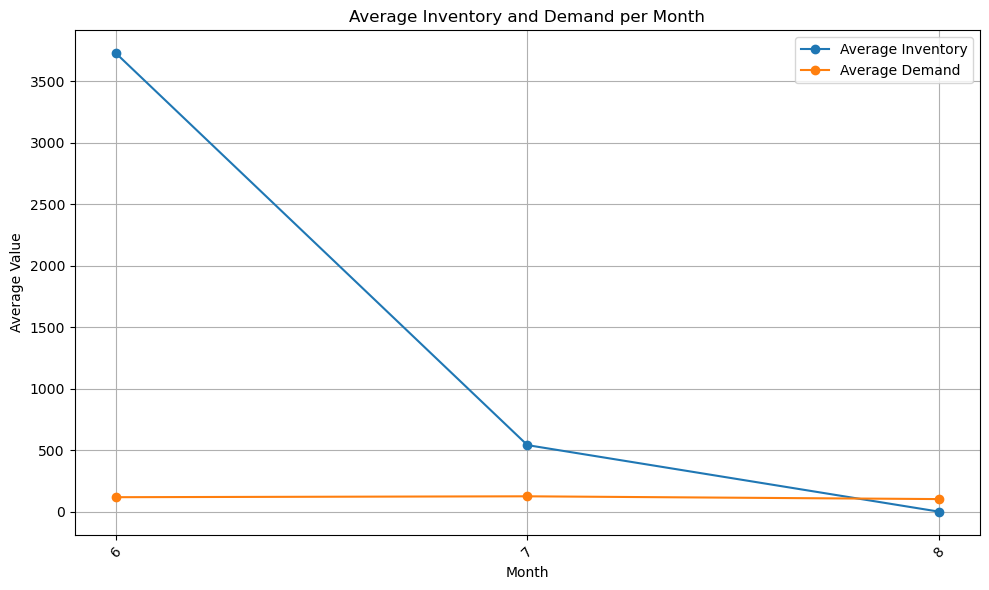

In [91]:
# Group by Month, and calculate average Inventory and Demand
monthly_avg = df.groupby('Month').agg({'Inventory': 'mean', 'Demand': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['Month'].astype(str), monthly_avg['Inventory'], marker='o', label='Average Inventory')
plt.plot(monthly_avg['Month'].astype(str), monthly_avg['Demand'], marker='o', label='Average Demand')

plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Average Inventory and Demand per Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

c:\Users\Hp\.anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


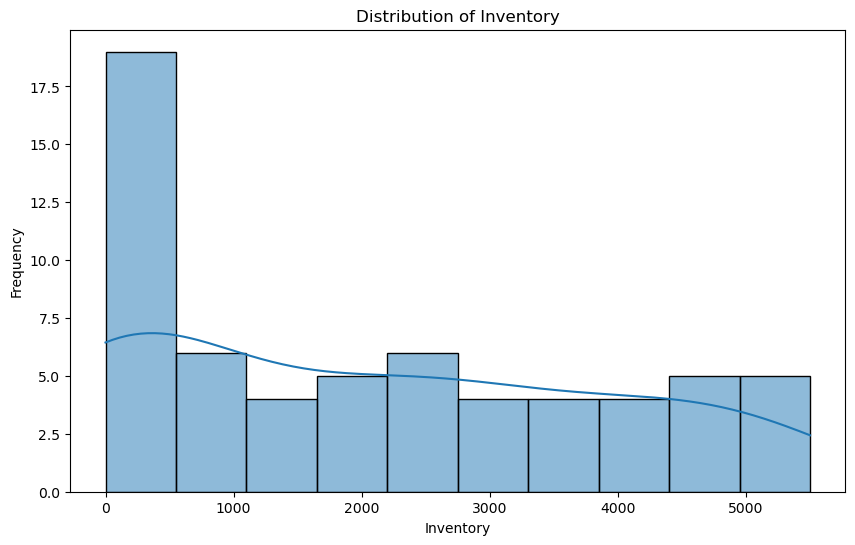

In [92]:
df['Inventory'].describe()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Inventory'], kde=True, bins=10)
plt.title('Distribution of Inventory')
plt.xlabel('Inventory')
plt.ylabel('Frequency')
plt.show()

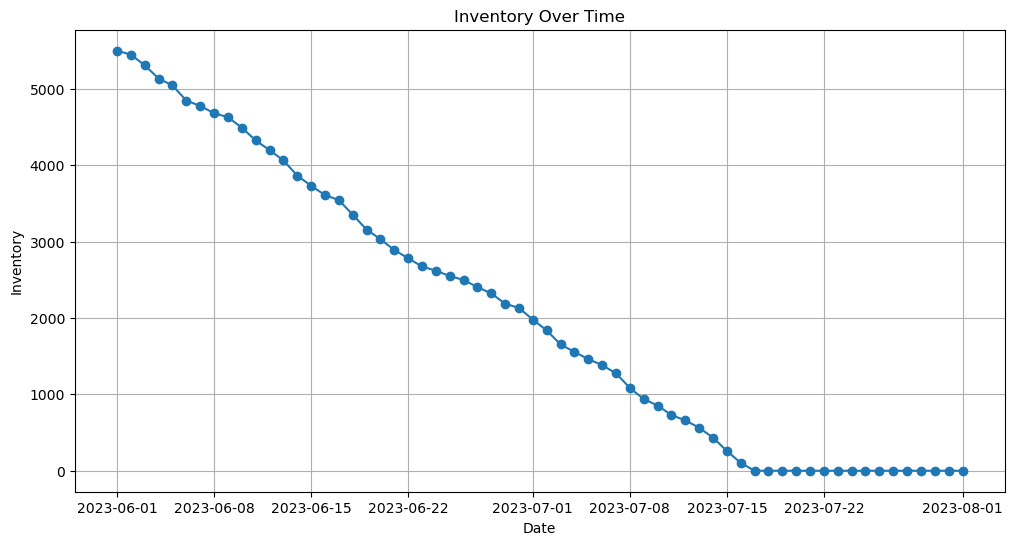

In [94]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot inventory over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Inventory'], marker='o')
plt.title('Inventory Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.grid(True)
plt.show()
